<h1>Outliers Detection using percentile method</h1>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

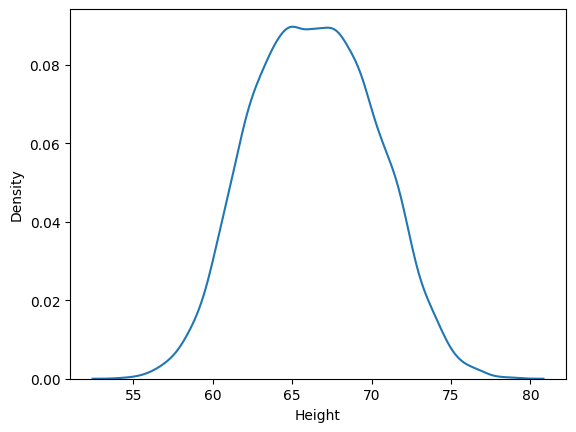

In [6]:
import seaborn as sns
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

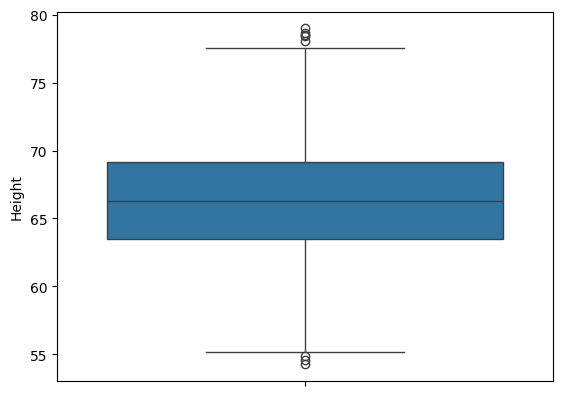

In [7]:
sns.boxplot(df['Height'])

In [8]:
upper_limit = df['Height'].quantile(.99)
lower_limit = df['Height'].quantile(.01)

In [9]:
upper_limit , lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [12]:
df[((df['Height'] > upper_limit) | (df['Height'] < lower_limit) )] 

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [13]:
new_df = df[((df['Height'] <= upper_limit) & (df['Height'] >= lower_limit) )] 

In [14]:
new_df.shape

(9800, 3)

In [17]:
df.describe() , new_df.describe()

(             Height        Weight
 count  10000.000000  10000.000000
 mean      66.367560    161.440357
 std        3.847528     32.108439
 min       54.263133     64.700127
 25%       63.505620    135.818051
 50%       66.318070    161.212928
 75%       69.174262    187.169525
 max       78.998742    269.989699,
             Height       Weight
 count  9800.000000  9800.000000
 mean     66.364366   161.399489
 std       3.645075    30.933549
 min      58.134496    77.523774
 25%      63.577162   136.322717
 50%      66.318070   161.212928
 75%      69.119896   186.753317
 max      74.785714   249.946283)

<Axes: xlabel='Height', ylabel='Density'>

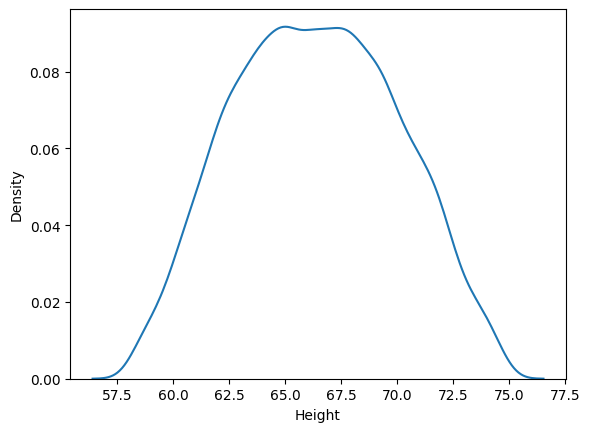

In [15]:
sns.kdeplot(new_df['Height'])

<Axes: ylabel='Height'>

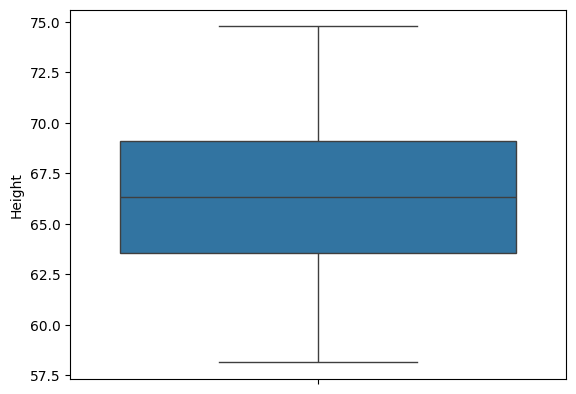

In [18]:
sns.boxplot(new_df['Height'])

In [22]:
new_df2 = df.copy()
new_df2['Height'] = np.where(
    df['Height'] >= upper_limit ,
    upper_limit ,
    np.where(
        df['Height'] < lower_limit,
        lower_limit,
        df['Height']
    )
)

In [23]:
new_df2['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

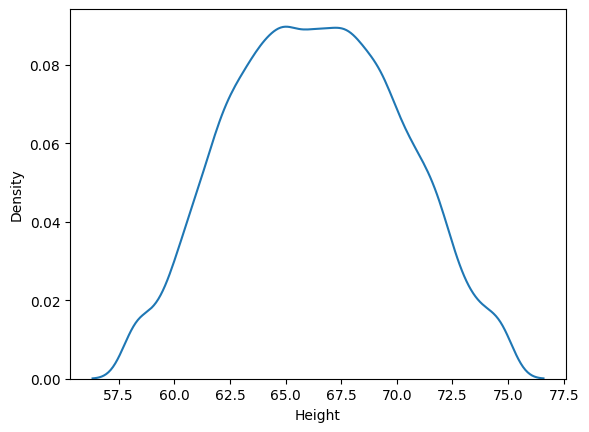

In [24]:
sns.kdeplot(new_df2['Height'])

<Axes: ylabel='Height'>

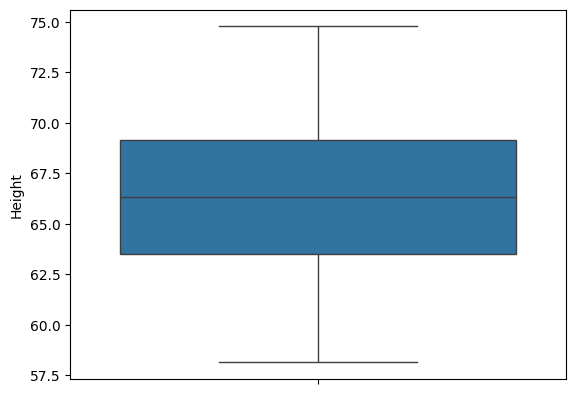

In [25]:
sns.boxplot(new_df2['Height'])